C:\Users\Lenovo\.conda\envs\DLR\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


训练步骤: 10 , 模型损失: 0.13470716774463654
训练步骤: 20 , 模型损失: 0.0065046944655478
训练步骤: 30 , 模型损失: 0.0010786696802824736
训练步骤: 40 , 模型损失: 0.0008656469872221351
训练步骤: 50 , 模型损失: 0.006743768695741892
训练步骤: 60 , 模型损失: 0.0022334661334753036
训练步骤: 70 , 模型损失: 0.004484838806092739
训练步骤: 80 , 模型损失: 0.0028724255971610546
训练步骤: 90 , 模型损失: 0.003353199688717723
训练步骤: 100 , 模型损失: 0.002679741708561778


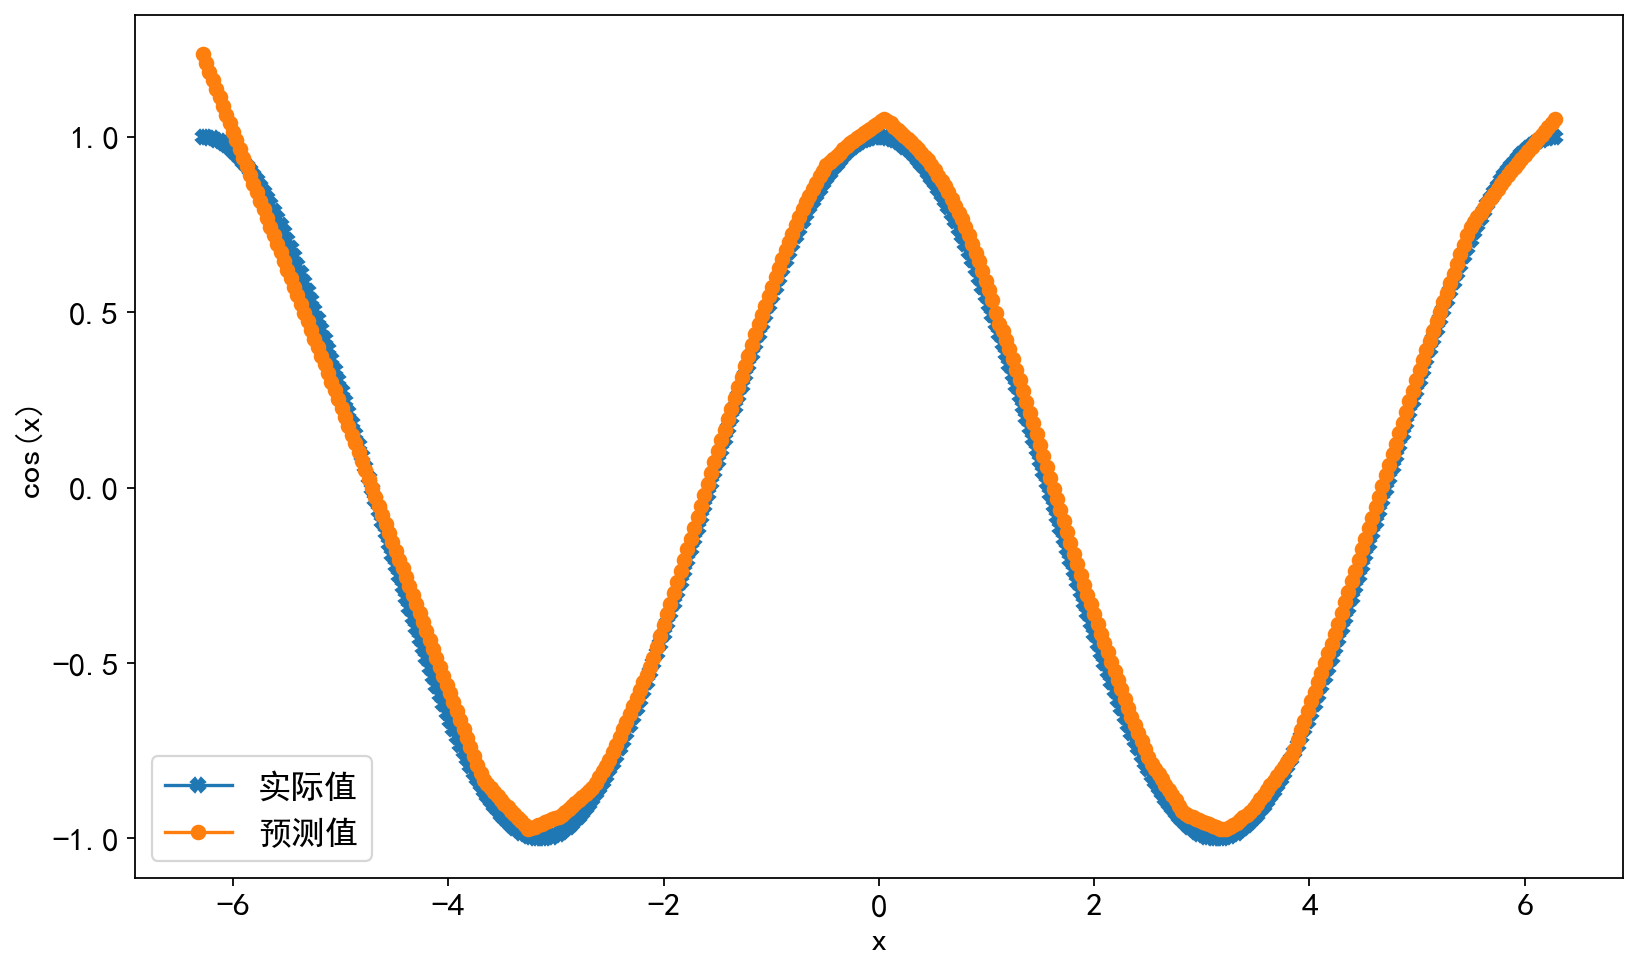

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# 设置matplotlib中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

#准备拟合数据
x=np.linspace(-2*np.pi,2*np.pi,400)# 生成-2π到2π的400个点
y=np.cos(x)
# 将数据做成数据集的模样
X=np.expand_dims(x,axis=1)# 将x从(400,)变为(400,1)，符合神经网络输入要求
Y=y.reshape(400,-1) # 将y从(400,)变为(400,1)
# 使用批训练方式
dataset=TensorDataset(torch.tensor(X,dtype=torch.float),torch.tensor(Y,dtype=torch.float))
dataloader=DataLoader(dataset,batch_size=10,shuffle=True)#提供批量加载、打乱数据等功能
#shuffle = True每个epoch都打乱 
#设置神经网络，这里就是一个简单的线性结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net=nn.Sequential(
            nn.Linear(in_features=1,out_features=10),nn.ReLU(),
            nn.Linear(10,100),nn.ReLU(),
            nn.Linear(100,10),nn.ReLU(),
            nn.Linear(10,1)
        )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)

net=Net()

#设置优化器和损失函数
optim=torch.optim.Adam(Net.parameters(),lr=0.001)#Adam优化器，学习率0.001
Loss=nn.MSELoss()# 均方误差损失函数

#开始训练模型，共训练 100次
for epoch in range(100):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x)
        loss=Loss(y_predict,batch_y)
        optim.zero_grad()#清空梯度
        loss.backward()#反向传播计算梯度
        optim.step()#更新参数
    # 每100次 的时候打印一次日志
    if (epoch+1)%10==0:
        print("训练步骤: {0} , 模型损失: {1}".format(epoch+1,loss.item()))

#使用训练好的模型进行预测
predict=net(torch.tensor(X,dtype=torch.float))

#绘图展示预测的和真实数据之间的差异
plt.figure(figsize=(12, 7), dpi=160)
plt.plot(x,y,label="实际值",marker = "X")
plt.plot(x,predict.detach().numpy(),label="预测值",marker='o')
#plt.title("余弦函数")
plt.xlabel("x",size=15)
plt.ylabel("cos(x)",size=15)
plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(fontsize=15)
#plt.savefig(fname="result.png",size=[20,20])
plt.show()